<a href="https://colab.research.google.com/github/cmAIdx/ml_learning_notebooks/blob/main/k-means-clustering-testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# Load the dataset
file_path = '/content/sample_data/Nutrient Composition Dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows to ensure it's loaded correctly
data.head()


,S.No,Protein,Fat,vitaminC,Fibre,Product
0,1,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with..."
1,2,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks
2,3,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include..."
3,4,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT"
4,5,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned"


In [4]:
# Check for missing values in the dataset
data.isnull().sum()


S.No        0
Protein     0
Fat         0
vitaminC    0
Fibre       0
Product     0
dtype: int64

In [5]:
# Get a statistical summary of the dataset
data.describe()


,S.No,Protein,Fat,vitaminC,Fibre
count,1746.000000,1746.000000,1746.000000,1746.000000,1746.000000
mean,873.500000,0.922470,0.900091,0.900146,0.900830
std,504.171102,0.627128,0.634617,0.623847,0.626875
min,1.000000,0.000128,0.000267,0.000029,0.002579
25%,437.250000,0.435853,0.394784,0.419103,0.389124
50%,873.500000,0.813025,0.804687,0.796290,0.820783
75%,1309.750000,1.295106,1.298988,1.280870,1.295732
max,1746.000000,4.016890,3.979364,4.013322,3.570331


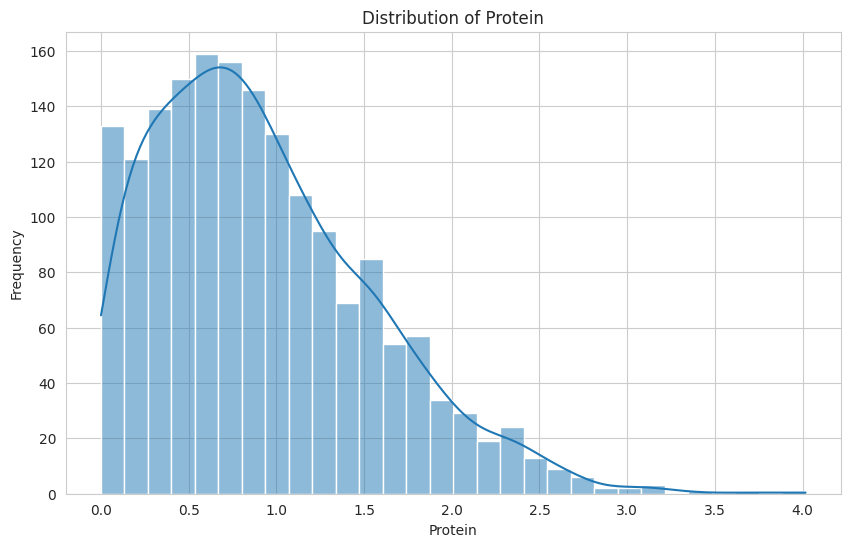

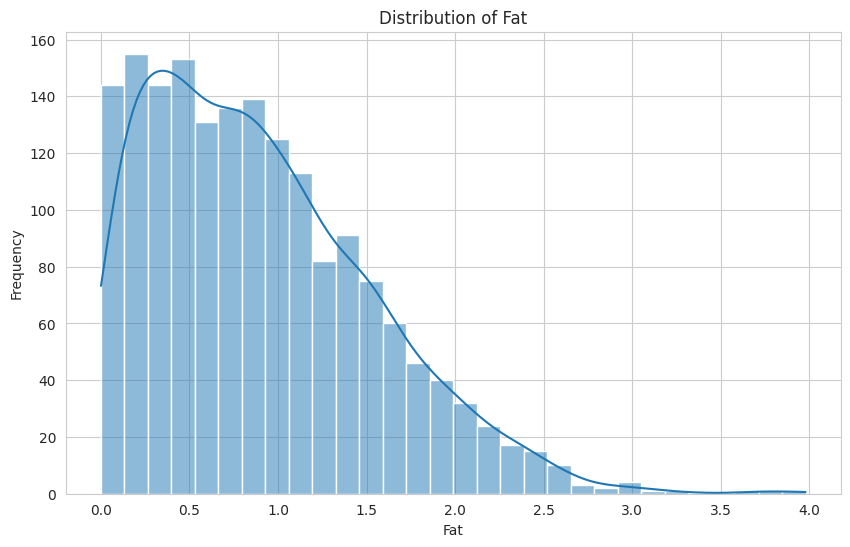

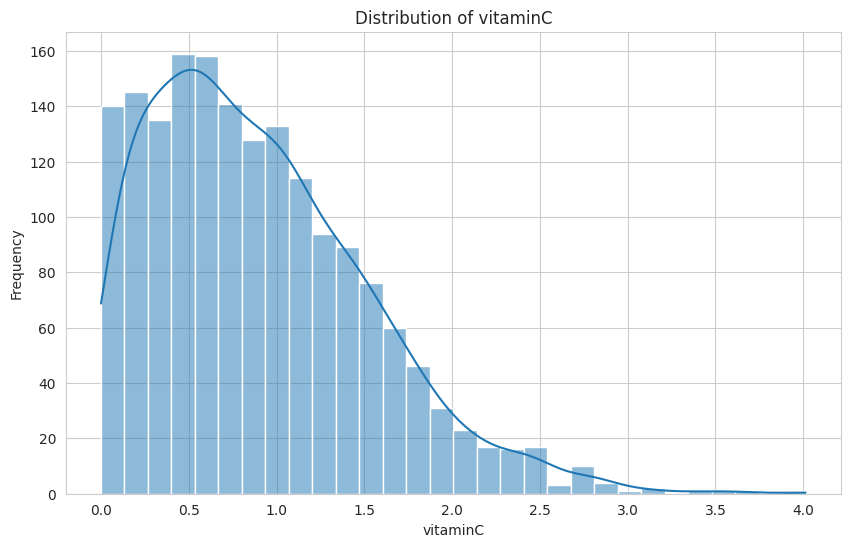

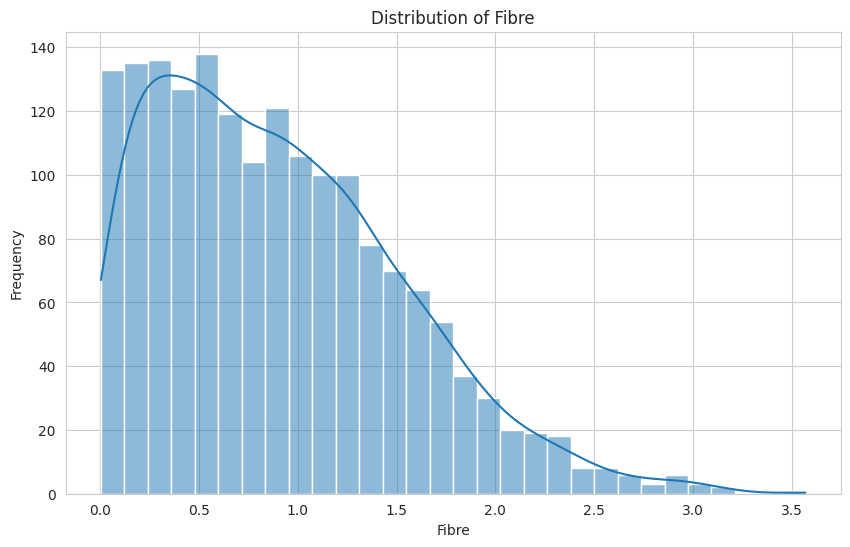

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting distribution of each nutrient
for column in ['Protein', 'Fat', 'vitaminC', 'Fibre']:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


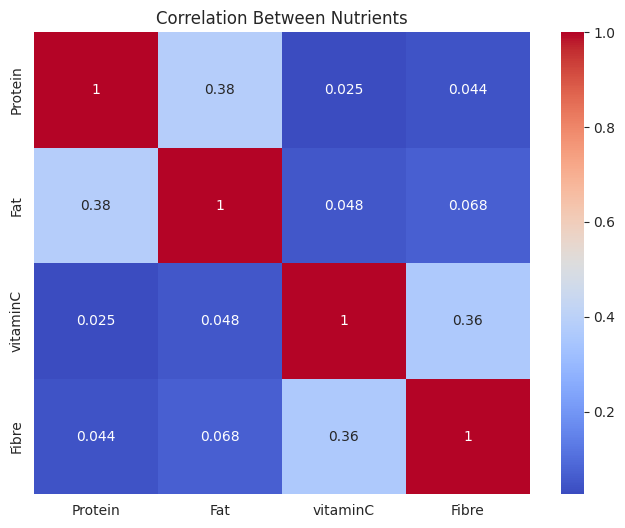

In [7]:
# Compute the pairwise correlation of columns
correlation_matrix = data[['Protein', 'Fat', 'vitaminC', 'Fibre']].corr()

# Generate a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Nutrients')
plt.show()


In [ ]:
# Example of handling missing values by dropping them
# data.dropna(inplace=True)

# Example of handling missing values by filling them with the mean
# data.fillna(data.mean(), inplace=True)


In [10]:
from sklearn.preprocessing import StandardScaler

# Features to be scaled
features = ['Protein', 'Fat', 'vitaminC', 'Fibre']

# Scaling the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Creating a DataFrame for the scaled data
data_scaled = pd.DataFrame(data_scaled, columns=features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

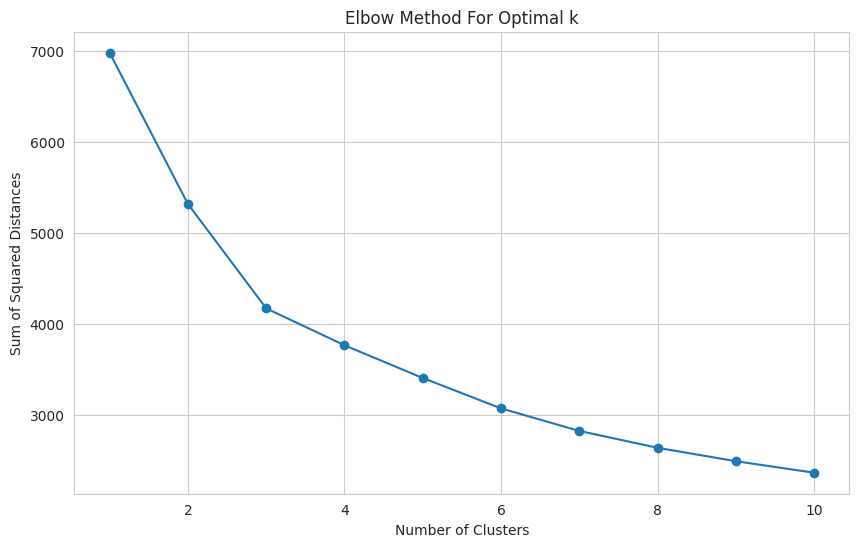

In [11]:
from sklearn.cluster import KMeans
import numpy as np

# Calculating SSD for a range of number of clusters
ssd = []
range_n_clusters = list(range(1, 11))
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000).fit(data_scaled)
    ssd.append(kmeans.inertia_)

# Plotting the SSDs for each `n_clusters`
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, ssd, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()


In [12]:
k_optimal = 3  # Example, adjust based on Elbow method result
kmeans = KMeans(n_clusters=k_optimal, max_iter=1000).fit(data_scaled)
data['Cluster'] = kmeans.labels_

# Display the first few rows with the cluster labels
data.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,S.No,Protein,Fat,vitaminC,Fibre,Product,Cluster
0,1,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with...",2
1,2,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks,1
2,3,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include...",2
3,4,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT",0
4,5,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned",0


In [13]:
# Calculating mean values of each nutrient by cluster
cluster_means = data.groupby('Cluster')[features].mean()

cluster_means


,Protein,Fat,vitaminC,Fibre
Cluster,,,,
0,0.639425,0.561383,0.609193,0.593598
1,1.551970,1.568413,0.795628,0.831012
2,0.766230,0.805197,1.553922,1.547249
